In [1]:
import numpy as np
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback
from tensorflow.keras import regularizers

In [2]:
batch = 64
train_dir = 'data/train'
val_dir = 'data/test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size= batch,
        color_mode= "grayscale",
        class_mode= 'categorical')
validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size = (48,48),
        batch_size = batch,
        color_mode = "grayscale",
        class_mode = 'categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
train_generator.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [4]:
validation_generator.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [5]:
emoji_dict = validation_generator.class_indices
emoji_dict = {v: k for k, v in emoji_dict.items()}

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1),kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(2048, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 44, 44, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 20, 128)       5

In [8]:
class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callback=myCallback()

In [9]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6) ,metrics=['accuracy'])


In [10]:
history = model.fit(
        train_generator,
        steps_per_epoch = len(train_generator.filenames)  // batch,
        epochs = 1000,
        callbacks=[callback],
        validation_data = validation_generator,
        validation_steps = len(train_generator.filenames) // batch/4)

Epoch 1/1000
448/448 [==============================] - 11s 26ms/step - loss: 4.4860 - accuracy: 0.2012 - val_loss: 3.8211 - val_accuracy: 0.2803
Epoch 2/1000
448/448 [==============================] - 11s 25ms/step - loss: 4.0615 - accuracy: 0.2632 - val_loss: 3.3652 - val_accuracy: 0.3744
Epoch 3/1000
448/448 [==============================] - 11s 25ms/step - loss: 3.8576 - accuracy: 0.2984 - val_loss: 3.3208 - val_accuracy: 0.3965
Epoch 4/1000
448/448 [==============================] - 11s 25ms/step - loss: 3.6632 - accuracy: 0.3293 - val_loss: 3.2253 - val_accuracy: 0.4176
Epoch 5/1000
448/448 [==============================] - 11s 25ms/step - loss: 3.5359 - accuracy: 0.3506 - val_loss: 3.1600 - val_accuracy: 0.4329
Epoch 6/1000
448/448 [==============================] - 11s 25ms/step - loss: 3.4246 - accuracy: 0.3732 - val_loss: 3.0889 - val_accuracy: 0.4501
Epoch 7/1000
448/448 [==============================] - 11s 25ms/step - loss: 3.3352 - accuracy: 0.3858 - val_loss: 3.0803 -

In [11]:
model.save("model.h5")

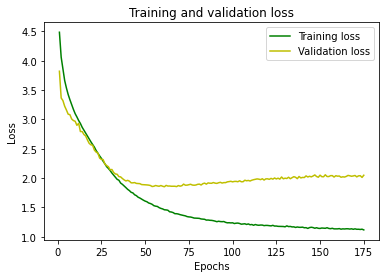

In [12]:
import matplotlib.pyplot as plt
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

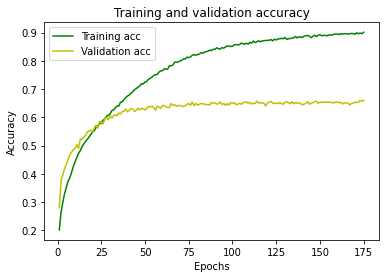

In [13]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Learning stops around 50ish epoch, It seems we are overfitting train set even though I tried a lot of regulazition it did not help at all.

Confusion Matrix
[[ 549   46  562 1029  683  685  441]
 [  56    8   66  106   74   84   42]
 [ 528   79  586 1042  709  703  450]
 [1030  134 1050 1782 1204 1193  822]
 [ 708   67  670 1224  909  839  548]
 [ 665   63  724 1218  818  822  520]
 [ 449   40  437  812  562  517  354]]
Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.14      0.14      3995
     disgust       0.02      0.02      0.02       436
        fear       0.14      0.14      0.14      4097
       happy       0.25      0.25      0.25      7215
     neutral       0.18      0.18      0.18      4965
         sad       0.17      0.17      0.17      4830
    surprise       0.11      0.11      0.11      3171

    accuracy                           0.17     28709
   macro avg       0.14      0.14      0.14     28709
weighted avg       0.17      0.17      0.17     28709



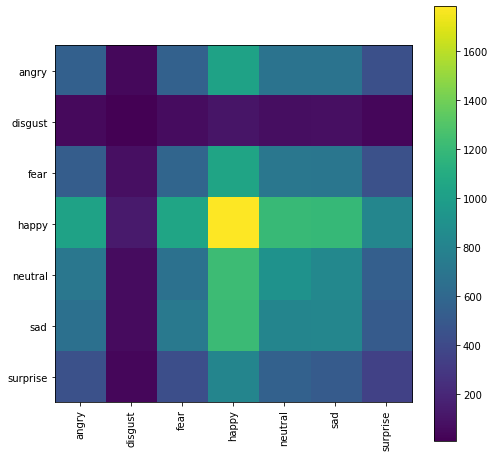

In [14]:
y_pred = model.predict(train_generator)
y_pred = np.argmax(y_pred, axis=1)
class_labels = train_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(train_generator.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(train_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

Confusion Matrix
[[115   5 105 223 163 223 124]
 [ 12   0  12  36  17  23  11]
 [118  16  94 262 202 198 134]
 [193  17 208 476 291 355 234]
 [154   8 137 322 222 233 157]
 [156  19 115 314 223 276 144]
 [111   8 104 203 137 168 100]]
Classification Report
              precision    recall  f1-score   support

       angry       0.13      0.12      0.13       958
     disgust       0.00      0.00      0.00       111
        fear       0.12      0.09      0.10      1024
       happy       0.26      0.27      0.26      1774
     neutral       0.18      0.18      0.18      1233
         sad       0.19      0.22      0.20      1247
    surprise       0.11      0.12      0.12       831

    accuracy                           0.18      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.18      0.18      7178



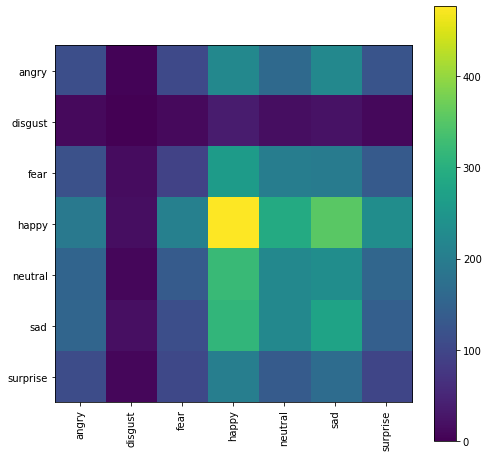

In [15]:
y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

cm_test = confusion_matrix(validation_generator.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

As we can see from Confussion Matrix we can not detect disgust its because both we have relatively low data according to other classes and I think they seems to look like suprise and shock class.